In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [20]:
dados = pd.read_csv('houses_to_rent_v2.csv')
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [21]:
coluna = {'city':'Cidade', 'area':'Area', 'rooms':'Qnt_Quartos', 'bathroom':'Qnt_Banheiros', 'parking spaces':'Vagas_Garagem',
'floor':'Andar', 'animal':'Animal', 'furniture':'Mobiliada', 'hoa (R$)':'Valor_Condo', 'rent amount (R$)':'Valor_Aluguel', 'property tax (R$)':'IPTU',
'fire insurance (R$)':'Seguro_Incendio', 'total (R$)':'Valor_Total'}

In [22]:
dados = dados.rename(columns = coluna)
dados.head()

,Cidade,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Andar,Animal,Mobiliada,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [23]:
dados.shape

(10692, 13)

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cidade           10692 non-null  object
 1   Area             10692 non-null  int64 
 2   Qnt_Quartos      10692 non-null  int64 
 3   Qnt_Banheiros    10692 non-null  int64 
 4   Vagas_Garagem    10692 non-null  int64 
 5   Andar            10692 non-null  object
 6   Animal           10692 non-null  object
 7   Mobiliada        10692 non-null  object
 8   Valor_Condo      10692 non-null  int64 
 9   Valor_Aluguel    10692 non-null  int64 
 10  IPTU             10692 non-null  int64 
 11  Seguro_Incendio  10692 non-null  int64 
 12  Valor_Total      10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Utilizando o método *info()* podemos perceber que os dados correspondem com seus tipos, exceto pela coluna *Andar* que ta definida com o tipo
*Object*.

In [25]:
dados.describe()

,Area,Qnt_Quartos,Qnt_Banheiros,Vagas_Garagem,Valor_Condo,Valor_Aluguel,IPTU,Seguro_Incendio,Valor_Total
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [26]:
dados.describe(include = 'object')

,Cidade,Andar,Animal,Mobiliada
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


A coluna *Andar* do dataset é bem curiosa, o resumo estatístico acima aponta que os dados com maior frequência para esta coluna é " - " (um traço) e também é o top registro


In [27]:
dados_copia = dados.copy()

In [34]:
colunas_Selecionadas = ['Cidade', 'Qnt_Quartos','Valor_Aluguel']
dados_agrupado = dados_copia.filter(items = colunas_Selecionadas)
dados_agrupado.head()

,Cidade,Qnt_Quartos,Valor_Aluguel
0,São Paulo,2,3300
1,São Paulo,4,4960
2,Porto Alegre,1,2800
3,Porto Alegre,2,1112
4,São Paulo,1,800


In [35]:
dados_agrupado.groupby('Cidade').size()

Cidade
Belo Horizonte    1258
Campinas           853
Porto Alegre      1193
Rio de Janeiro    1501
São Paulo         5887
dtype: int64

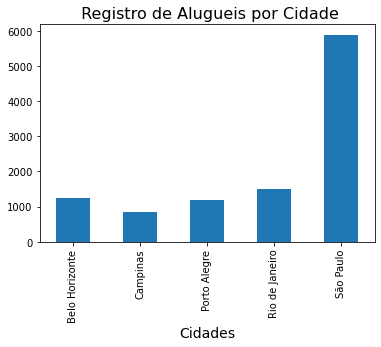

In [39]:
dados_agrupado.groupby('Cidade').size().plot(kind = 'bar')
plt.title(' Registro de Alugueis por Cidade', fontdict = {'size': 16})
plt.xlabel('Cidades', fontdict = {'size': 14})
plt.show()

In [47]:
dados_agrupado.groupby('Cidade').max()

,Qnt_Quartos,Valor_Aluguel
Cidade,,
Belo Horizonte,10,15000
Campinas,7,15000
Porto Alegre,8,19000
Rio de Janeiro,13,15000
São Paulo,10,45000


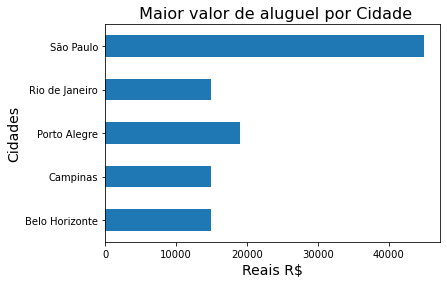

In [50]:
dados_agrupado.groupby('Cidade')['Valor_Aluguel'].max().plot(kind = 'barh')
plt.title(' Maior valor de aluguel por Cidade', fontdict = {'size': 16})
plt.xlabel('Reais R$', fontdict = {'size': 14})
plt.ylabel('Cidades', fontdict = {'size':14})
plt.show()

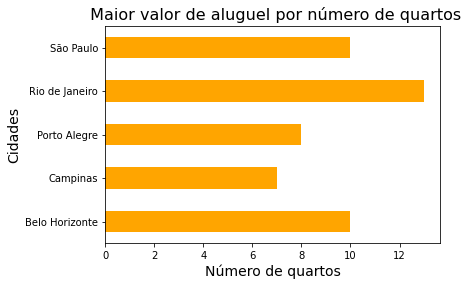

In [52]:
dados_agrupado.groupby('Cidade')['Qnt_Quartos'].max().plot(kind = 'barh', color = 'orange')
plt.title(' Maior valor de aluguel por número de quartos', fontdict = {'size': 16})
plt.ylabel('Cidades', fontdict = {'size': 14})
plt.xlabel('Número de quartos', fontdict = {'size': 14})
plt.show()